# Replication Paper - The Consequences of Radical Reform: The French Revolution, By Daron Acemoglu, Davide Cantoni, Simon Johnson, and James A. Robinson

### Juan Esteban Rincon Poveda


## Introduction
The paper "The Consequences of Radical Reform: The French Revolution" by Daron Acemoglu, Davide Cantoni, Simon Johnson, and James A. Robinson, analyze the effect that the institutional changes introduced by the French revolution had in Europe. Most exactly, the effect of this imposed changes in politics, in some German territories.
The political changes imposed during the French Revolution were: civil legal code, the abolition of guilds and the remnants of feudalism, the introduction of equality before the law, and the undermining of aristocratic privileges.
The idea is that this changes could have had an effect over the economic growth of some territories, but this effect can be negative, via the negative results of having imposed politics of a foreign country or positive via the elimination of the oligarchies, some entry barriers, and restrictions on trade in labor and other markets.

The authors, start with an analysis of the relationship between the years of French occupation in each territory and the urbanization rate, using this as an estimate of "French treatment" and economic prosperity respectively. Then, they look for a relationship between the changes in polities, institutional outcomes and long term economic growth, by using data of the moment in which the institutional reforms where implemented. As it will be shown later, the authors find "no evidence that the reforms imposed by the French had negative economic consequences. On the contrary, evidence from a variety of different empirical strategies shows that they had positive effects" (p 3287).

#### Historical Overview
Before the French Revolution, Europe was mostly dominated by two big oligarchies; the landed nobility in agriculture and the urban-based oligarchy controlling commerce. A certain type of feudalism remained working with unfree labor relationships and serfdom. In some special cases, serfdom was replaced with different types of taxes that had to been paid to landowners. On the other hand, there were many occupations controlled by guilds, who could control the entry to those professions and in some cases restrict the adoption of new technologies.

By 1795 with napoleon's leadership, France had begun to control some territories, and even in 1802 territories like Rhineland were officially incorporated into France. Many of the institutional changes were introduced during the invasion of the French revolutionary armies. For example, between 1795 and 1798 the seigneurial regime and the guilds were abolished, therefore, as we will see, it was approximately during this period where many of the imposed changes occured. Most of this reforms remained until 1815 after the final colapse of Napoleon, and depending on the circumstances some of those reforms were suppressed or not. 

#### Data
For the investigation, the authors use information period 1798 - 1900, about 19 different preunity policies in Germany, some of which are independent states or provinces of larger states. Some of these territories will be used as a treatment group with 1 year or more of French control, and some others as control group without any year of French control. Besides, an index of reforms will be created by adding the number of years each particular reform had been in place and dividing by 4. This index will help the authors later to make clearer the difference between the treatment group and the control group.

Also it will be used the urbanization rate as a measure of economic prosperity, and data on the sectoral composition of employment for 64 German districts for the years 1849, 1882, 1895, and 1907, as a measure of industrialization.

## Replication


#### Before start:

- For the descriptive statistics graphs and tables i will show first the commands, then the author's figure and then the replication.
- For the regressions, I will show first the author's table, and then I will show the replication. Then you will be able to see the commands that I used to make all the regressions.
- Since the author does not indicate in some regression tables what values is he using in brackets, I decided to put the standard errors instead. 
- Also, I use the usual significance levels in economy literature.

 `*p < 0.1 , ** p < 0.05 , *** p < 0.01`
 
 
 
 - For the regression tables I use pystout package.

In [4]:

#Import all the packages
from __future__ import division
%pylab --no-import-all
%matplotlib inline
import pandas as pd
import numpy as np
import os


pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)
    
    import matplotlib as mpl
import seaborn as sns
sns.set()

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [5]:
#Import the first database
data1 = pd.read_stata(pathout + 'replication_dataset.dta')

We will now re-make the index of reforms using ```data1``` provided by the authors, and using the formula explained before. ```table 1``` and ```graph 1``` will use some of this data, but in the case of the graph, the paper doesn't say what years are being used, so we will make it for the main years.

In [6]:
#INDEX 1850
codigocivil1850 = -((data1['ccodenoalr'] -data1['ccodenoalroff']) + (data1['ccodenoalron'] - 1850))
codigocivil1850[codigocivil1850<0]=0
servidumbre1850 = -((data1['agreform1first'] -data1['agreform1off']) + (data1['agreform1on'] - 1850))
servidumbre1850[servidumbre1850<0]=0
agraria1850 = -((data1['agreform2first'] -data1['agreform2off']) + (data1['agreform2on'] - 1850))
agraria1850[agraria1850<0]=0
gremios1850 = -((data1['guildsfirst'] -data1['guildsoff']) + (data1['guildson'] - 1850))
gremios1850[gremios1850<0]=0
index1850 = (codigocivil1850 + servidumbre1850+ agraria1850+ gremios1850)/4


#INDEX 1900
codigocivil1900 = -((data1['ccodenoalr'] -data1['ccodenoalroff']) + (data1['ccodenoalron'] - 1900))
codigocivil1900[codigocivil1900<0]=0
servidumbre1900 = -((data1['agreform1first'] -data1['agreform1off']) + (data1['agreform1on'] - 1900))
servidumbre1900[servidumbre1900<0]=0
agraria1900 = -((data1['agreform2first'] -data1['agreform2off']) + (data1['agreform2on'] - 1900))
agraria1900[agraria1900<0]=0
gremios1900 = -((data1['guildsfirst'] -data1['guildsoff']) + (data1['guildson'] - 1900))
gremios1900[gremios1900<0]=0
index1900 = (codigocivil1900 + servidumbre1900+ agraria1900+ gremios1900)/4
data1['index1900']=index1900
data1['index1850']=index1850


In [7]:
#Now we are adding a column that tell us if the territory is treatment or control group
data1['napoleon'] = np.where(data1['fpresence']>0,1,0) 


#Now we are able to compare the paper results and our results for the index in 1850 and 1900
means = data1.groupby(['year', 'napoleon'])['yearsref'].mean().unstack()


In [8]:
#Mean done by me 
meansrep = data1.groupby(['napoleon'])['index1850'].mean()


We have just recreated the value for the index means in 1850 and 1900. We can easily do this procedure again for the remaining years.
The next table will resume and compare this result with the result that the authors got.

In [9]:
index = [['Paper', 20.704546, 29.40625],
        ['Replication', 20.704545, 27.656250]]

gp = ['Control', 'Treatment']
         
index = pd.DataFrame(index, columns=[''] + [str(y) for y in gp])

index


,,Control,Treatment
0,Paper,20.704546,29.40625
1,Replication,20.704545,27.65625


As we can see, we got the same value for the mean in the control group but not for  the treatment group. Something interesting in the paper is that in the database, provided by the author, they say that the mean for treatment group is `29.40625`, but in the paper it says `32.42`. That can make us think in a possible of error of the authors at the moment of making the table1.

## Table 1 - Original. Territories And Reforms
For Table 1 we will use our calculations of the reforms index, using the data provided by the authors. This information is contained on variables `index1850` and `index1900`. As we will see, we get a result very close to the original paper excepting the values for the mean, as explained before. 


![Imagen](img/Tabla1.png)


In [10]:
table11 = [['Rhineland', 19, 1802,1789,1804,1795,50.25,100.25],
        ['Palatinate (Bavaria)', 19, 1802,1789,1804,1795,50.25,100.25 ],
      ['Mark', 6, '1810-15 , 1900',1808,1825,1809,28.25,65.75],
          ['Westphalia', 6, '1810-15 , 1900',1808,1825,1809,28.25,65.75],
          ['Brunswick', 6, '1808-14 , 1900','1808-18 , 1834','1808-18 , 1834','1808-15 , 1864',16,50],
          ['Province of Saxony', 6, '1808–15, 1900',1808,1809,1809,32.75,70.25],
          ['Hessen-Kassel', 6, '1808–14, 1900','1808–14, 1832','1809–14, 1832','1808–16, 1869',15.25,48],
          ['Hanover', 3, '1808–13, 1900','1808–14, 1833','1809–14, 1833','1808–15, 1869',15.25,47],
           ['Baden', 0, 1810,1783,1820,1862,34.25,81.25],
           ['Bavaria, southern half', 0, 1900,1808,1826,1868,16.5,49.5],
         ['Hessen-Darmstadt', 0, 1900,1811,1816,1866,18.25,51.275],
           ['Saxony', 0, 1865,1832,1832,1862,9,52.25],
            ['Württemberg', 0, 1900,1817,1836,1862,11.75,46.25],
           
            ['Brandenburg', 0, 1900,1811,1821,1810,27,64.5],
            ['East Prussia', 0, 1900,1811,1821,1810,27,64.5],
            ['Pomerania', 0, 1900,1811,1821,1810,27,64.5],
              ['Silesia', 0, 1900,1811,1821,1810,27,64.5],
           ['Mecklenburg-Schwerin', 0, 1900,1820,1862,1869,7.5,37.25],
           ['Schleswig-Holstein', 0, 1900,1805,1805,1867,22.5,55.75],   
          ]

t1 = ['Years of French presence', 'Civil Code','Abolition of serfdom','Agrarian reform', 'Abolition of guilds','Reforms index 1850',
     'Reform index 1900']
         
table11 = pd.DataFrame(table11, columns=['Territory'] + [str(y) for y in t1])


## Table 1 - Replication.

In [11]:
table11

,Territory,Years of French presence,Civil Code,Abolition of serfdom,Agrarian reform,Abolition of guilds,Reforms index 1850,Reform index 1900
0,Rhineland,19,1802,1789,1804,1795,50.25,100.250
1,Palatinate (Bavaria),19,1802,1789,1804,1795,50.25,100.250
2,Mark,6,"1810-15 , 1900",1808,1825,1809,28.25,65.750
3,Westphalia,6,"1810-15 , 1900",1808,1825,1809,28.25,65.750
4,Brunswick,6,"1808-14 , 1900","1808-18 , 1834","1808-18 , 1834","1808-15 , 1864",16.00,50.000
5,Province of Saxony,6,"1808–15, 1900",1808,1809,1809,32.75,70.250
6,Hessen-Kassel,6,"1808–14, 1900","1808–14, 1832","1809–14, 1832","1808–16, 1869",15.25,48.000
7,Hanover,3,"1808–13, 1900","1808–14, 1833","1809–14, 1833","1808–15, 1869",15.25,47.000
8,Baden,0,1810,1783,1820,1862,34.25,81.250
9,"Bavaria, southern half",0,1900,1808,1826,1868,16.50,49.500


## Figure 1 - Original. Reforms Index, by Treatment Group

For Figure 1 we will use the variable `yearsref`, available on the original database. Thanks to the new variable `group`, created here, we will be able to differentiante by treatment or control group. Also, with the table `means`, we got the mean for each year and for each group.

![Imagen](img/Figura1.png)

In [12]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import figure


## Figure 1 - Replication

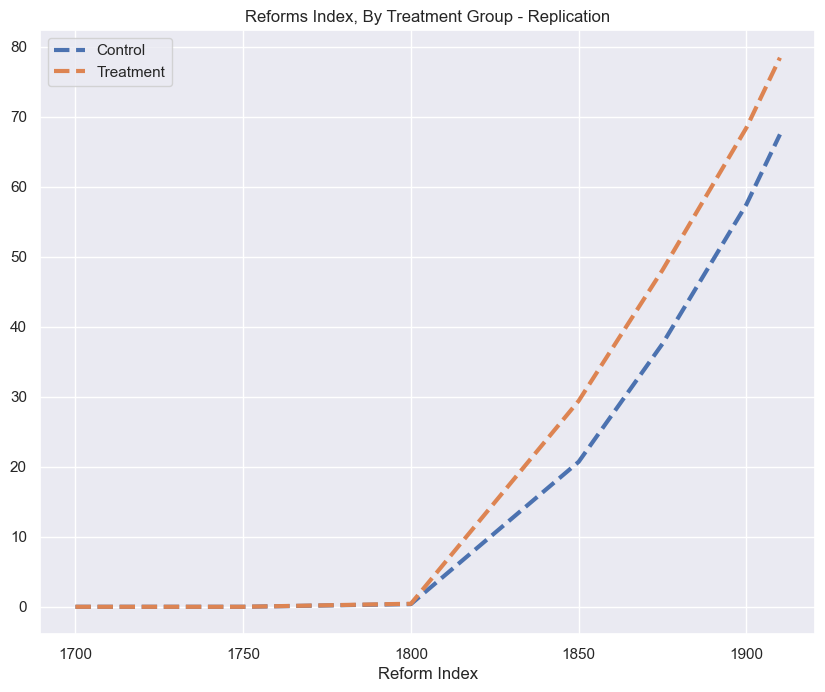

In [13]:
fig, ax = plt.subplots(figsize=(10,8),dpi=100)
plt.style.use('seaborn-colorblind')
plt.plot(means, linestyle='--' , linewidth=3)

plt.title('Reforms Index, By Treatment Group - Replication')
plt.legend(['Control','Treatment'])
plt.xlabel('Year')
plt.xlabel('Reform Index')



plt.show()

## Table 2 - Original. Descriptive Statistics

For table 2 we will start getting the values for the urbanization rates differentiating by West of the Elbe, and all the sample. Also differentiating by control and treatment group. In most of the cases, we were able to get the same value that the authors, excepting the value for the variable `distpa` that was a measure of the territories distance to Paris.

In [209]:
#Dummy for treatment and control group (created before)
data1['napoleon'] = np.where(data1['fpresence']>0,1,0) 

In [210]:
#Urbanization Rate
## Column 5. All  - WholeSample

datatable2=data1
datata2  = datatable2.dropna()
g1 = datata2.groupby(['year'])
col5 = g1.apply(lambda x: pd.Series([np.average(x['urbrate'], weights=x['totalpop1750']),], 
                                    index=['urbrate']))
#Column 4. WholeSample - Control and Treatment
datatable2=data1
datata22  = datatable2.dropna()
g2 = datata22.groupby(['year','napoleon'])
col4 = g2.apply(lambda x: pd.Series([np.average(x['urbrate'], weights=x['totalpop1750']),    ], 
                                    index=['urbrate']))
#Column 2 and 3. West of the elbe - Control and Treatment
datatable2=data1
datata21  = datatable2.dropna()
g3 = datata21.groupby(['year','napoleon','westelbe'])
col3 = g3.apply(lambda x: pd.Series([np.average(x['urbrate'], weights=x['totalpop1750']),  ], 
                                    index=['urbrate']))
# Column1 - West of elbe All

datatable2=data1
datata211  = datatable2.dropna()
g4 = datata211.groupby(['year','westelbe'])
col1 = g4.apply(lambda x: pd.Series([np.average(x['urbrate'], weights=x['totalpop1750']),    ], 
                                    index=['urbrate']))


In [211]:
# Share of protestant 

#Column 1 - West of elbe

table2p=data1
table2p2  = table2p.fillna(1)
f2 = table2p2.groupby(['westelbe'])
pcol2 = f2.apply(lambda x: pd.Series([np.average(x['protestant'], weights=x['totalpop1750']),  ], 
                                    index=['protestant']))
## Column 2 and 3 -  West of the elbe Control and Treatment

table2p=data1
table2p1  = table2p.fillna(1)
f1 = table2p1.groupby(['westelbe','napoleon'])
pcol1 = f1.apply(lambda x: pd.Series([np.average(x['protestant'], weights=x['totalpop1750']),  ], 
                                    index=['protestant']))


#Column 4 - Whole Sample Control Group
table2p=data1
table2p2  = table2p.fillna(0)
f2 = table2p2.groupby(['napoleon'])
pcol3 = f2.apply(lambda x: pd.Series([np.average(x['protestant'], weights=x['totalpop1750']), ], 
                                    index=['protestant']))



In [212]:
## Latitude

#Column 1 and 5 - West of elbe and Whole Sample

table3 = data1.dropna()
l2 = table3.groupby(['westelbe'])
lcol = l2.apply(lambda x: pd.Series([np.average(x['latitude'], weights=x['totalpop1750']),  ], 
                                    index=['latitude']))

#Column 2 and 3 - West of the Elbe. Treatment and Control Group

table3 = data1.dropna()
l1 = table3.groupby(['westelbe','napoleon'])
lcol2 = l1.apply(lambda x: pd.Series([np.average(x['latitude'], weights=x['totalpop1750']), ], 
                                    index=['latitude']))

#Column 4 Whole Sample. Treatment And Control Group

table3 = data1.dropna()
l3 = table3.groupby(['napoleon'])
lcol3 = l3.apply(lambda x: pd.Series([np.average(x['latitude'], weights=x['totalpop1750']), ], 
                                    index=['latitude']))

In [213]:
# Longitude
#Column 1 and 5 - West of elbe and Whole Sample

table3 = data1.dropna()
long = table3.groupby(['westelbe'])
longcol = long.apply(lambda x: pd.Series([np.average(x['longitude'], weights=x['totalpop1750']),    ], 
                                    index=['longitude']))

#Column 2 and 3 - West of the Elbe. Treatment and Control Group

table3 = data1.dropna()
long2 = table3.groupby(['westelbe','napoleon'])
longcol2 = long2.apply(lambda x: pd.Series([np.average(x['longitude'], weights=x['totalpop1750']), ], 
                                    index=['longitude']))

#Column 4 Whole Sample. Treatment And Control Group

table3 = data1.dropna()
long3 = table3.groupby(['napoleon'])
longcol3 = long3.apply(lambda x: pd.Series([np.average(x['longitude'], weights=x['totalpop1750']),], 
                                    index=['longitude']))


In [214]:
## Distance to Paris

#Column 1 and 5 - West of Elbe and Whole Sample

table3 = data1.dropna()
dis = table3.groupby(['westelbe'])
distcol = dis.apply(lambda x: pd.Series([np.average(x['distpa'], weights=x['totalpop1750']),  ], 
                                    index=['distpa']))

#Column 2 and 3 - West of the Elbe. Treatment and Control Group

table3 = data1.dropna()
dis2 = table3.groupby(['westelbe','napoleon'])
discol2 = dis2.apply(lambda x: pd.Series([np.average(x['distpa'], weights=x['totalpop1750']),], 
                                    index=['distpa']))


#Column 4 Whole Sample. Treatment And Control Group

table3 = data1.dropna()
dis3 = table3.groupby(['napoleon'])
discol3 = dis3.apply(lambda x: pd.Series([np.average(x['distpa'], weights=x['totalpop1750']),], 
                                    index=['distpa']))


In [20]:
    
ta2 = [['Urbanization in 1700', 5.86, 5.49,6.36,7.68,7.26],
       ['Urbanization in 1750', 7.89, 7.66,8.09,8.89,8.59],
       ['Urbanization in 1800', 10.23,8.44 ,11.75,10.22,10.8],
       ['Urbanization in 1850', 13.78, 12.38,14.96,14.45,14.64],
       ['Urbanization in 1875', 25.70, 22.22,28.66,25.18,26.52],
       ['Urbanization in 1900', 39.89,35.60 ,43.55,38.26,40.29],
       
       ['Share Protestant', 0.57,5.32 ,6.18,6.77,'0.84*'],
         ['Latitude', 50.43,49.28 ,51.45,50.97,52.97],
       ['Longitude', 9.99,10.95 ,9.12,12.74,'14.85*'], ]

t2=['West: All', 'West: Control','West: Treated','Whole Sample: Control', 'Whole Sample: All']  
ta2 = pd.DataFrame(ta2, columns=[''] + [str(y) for y in t2])



![Imagen](img/Tabla2.png)

### Table 2 - Replication. Descriptive Statistics

In [21]:
ta2

,,West: All,West: Control,West: Treated,Whole Sample: Control,Whole Sample: All
0,Urbanization in 1700,5.86,5.49,6.36,7.68,7.26
1,Urbanization in 1750,7.89,7.66,8.09,8.89,8.59
2,Urbanization in 1800,10.23,8.44,11.75,10.22,10.8
3,Urbanization in 1850,13.78,12.38,14.96,14.45,14.64
4,Urbanization in 1875,25.70,22.22,28.66,25.18,26.52
5,Urbanization in 1900,39.89,35.60,43.55,38.26,40.29
6,Share Protestant,0.57,5.32,6.18,6.77,0.84*
7,Latitude,50.43,49.28,51.45,50.97,52.97
8,Longitude,9.99,10.95,9.12,12.74,14.85*


The data for table 2 is contained in the following variables:

  - Urbanization rate: ``col1`` , ```col3``` , ```col4``` and ```col5```
  - Share Protestant: `pcol2` , `pcol1` and `pcol3`
  - Latitude:   `lcol` , `lcol2`  and `lcol3`
  - Longitude: `longcol` , `longcol2` and `longcol3`
  
###### Distance to Paris is not in the table since i was not able to recreate the values

### Figure 2A. Urbanization Rates, by Treatment Group


![Imagen](img/Figura21.png)

In [22]:
datafig2 = pd.read_stata(pathout + 'replication_dataset.dta')

In [23]:
meansfig = data1.groupby(['year', 'napoleon'])['urbrate'].mean().unstack()
meansfig2 = data1.groupby(['year', 'westelbe'])['urbrate'].mean().unstack()

In [24]:

dataf2 = {'Year': [1700, 1750, 1800, 1850,1875,1880,1885,1895,1900,1905,1910], 
        'West': [4.965689 ,7.704638 ,10.237379 ,13.382242 ,24.521772 ,28.461521 ,
                   30.805981 ,38.269096 ,39.198532 ,42.333805 ,45.268684], 
          'treatment': [5.359634,8.161680,11.891592,14.509822,26.807312,30.080849,32.355259,40.437576,42.384228,43.021275,45.624130
]
       } 
fig2 = pd.DataFrame(dataf2)
Year = pd.Categorical(fig2.Year)
fig2 = fig2.set_index([ 'Year'])

In [25]:

fig2['Diference']=  fig2.treatment - fig2.West 



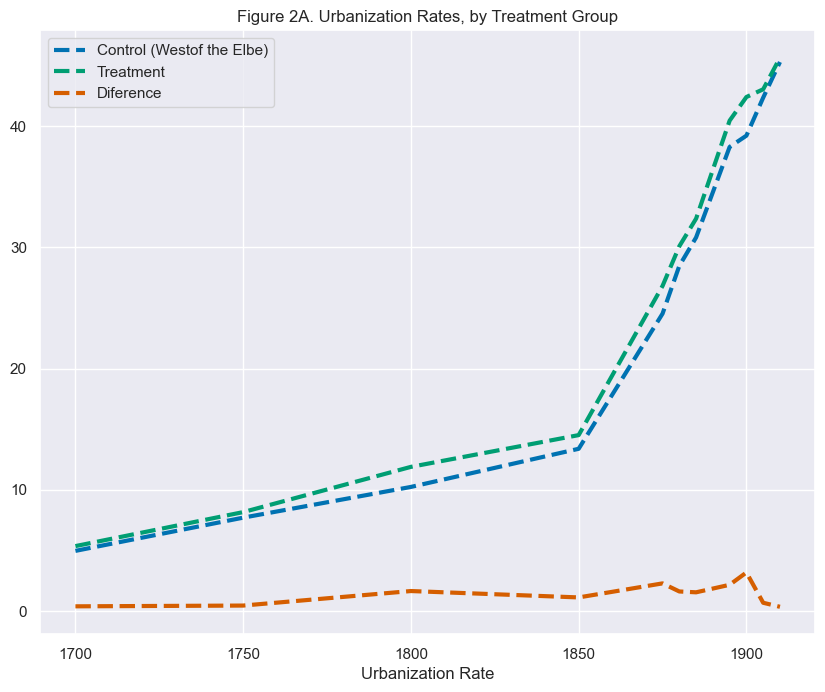

In [26]:
fig, ax = plt.subplots(figsize=(10,8),dpi=100)
plt.style.use('seaborn-colorblind')
plt.plot(fig2, linestyle='--' , linewidth=3)

plt.title('Figure 2A. Urbanization Rates, by Treatment Group')
plt.legend(['Control (Westof the Elbe)','Treatment','Diference'])
plt.xlabel('Year')
plt.xlabel('Urbanization Rate')



plt.show()

### Figure 2B. Urbanization Rates, by Treatment Group

![Imagen](img/Figura22.png)

In [27]:
meansfig = data1.groupby(['year', 'napoleon'])['urbrate'].mean().unstack()

In [28]:
dataf22 = {'Year': [1700, 1750, 1800, 1850,1875,1880,1885,1895,1900,1905,1910], 
        'Control': [6.301950,8.037416,10.001850,14.123228,24.170938,23.895399,26.050716,31.349073,
                    36.435326,37.582905,40.397572], 
          
          'Treatment': [5.359634,8.161680,11.891592,14.509822,26.807312,30.080849,32.355259,
                        40.437576,42.384228,43.021275,45.624130
                       ]
       } 
fig22 = pd.DataFrame(dataf22)
Year = pd.Categorical(fig22.Year)
fig22 = fig22.set_index([ 'Year'])

In [29]:
fig22['difference']= fig22.Treatment - fig22.Control

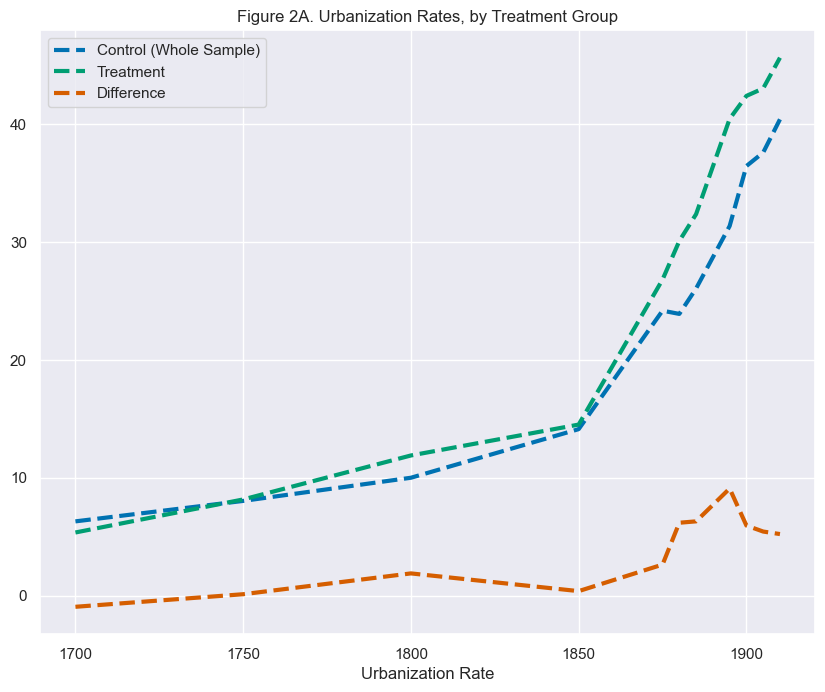

In [30]:
fig, ax = plt.subplots(figsize=(10,8),dpi=100)
plt.style.use('seaborn-colorblind')
plt.plot(fig22, linestyle='--' , linewidth=3)

plt.title('Figure 2A. Urbanization Rates, by Treatment Group')
plt.legend(['Control (Whole Sample)','Treatment','Difference'])
plt.xlabel('Year')
plt.xlabel('Urbanization Rate')



plt.show()

## Table 3 - Urbanization In Germany

Table 3 contains 4 regresions:
#### - Regresion 1: 
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr $
 
For the West of Elbe and weighted by total population in 1750 
 
 #### - Regresion 2:
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr $
 
 
For the West of Elbe and no weight
 
 
####  - Regresion 3:
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr $
 

For the whole sample and weighted by total population in 1750
 
 
####  - Regresion 4: 
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr $
 

For the whole sample
 
Where:

- Urbrate: (urban population /total population) *100
- fpresence1750: Is an interacction between fpresence and yr1750
- fpresence1800: Is an interacction between fpresence and yr1800
- fpresence1850: Is an interacction between fpresence and yr1850
- fpresence1875: Is an interacction between fpresence and yr1875
- fpresence1900: Is an interacction between fpresence and yr1900
- yr*: Abbreviation for 6 Dummy variable = 1 for yr1700, yr1750, yr1800, yr1850, yr1875 and yr1900
 

![Imagen](img/Tabla3.png)

![Imagen](img/Tabla3replica.png)

In table 3 we can see that by 1800 the areas with more years of French presence were growing slower,and by 1850 there wasn't an statistical effect of years of French presence on the growth of urbanization. By 1900 we saw an positive effect of the French presence over the urbanization rates.
Also we can see that for west of the Elby, we got a higher effect of the French presence, relative to all the sample, in 1850, 1875 and 1900. 
We can see that we didn't got any statisticly significant value, but this is explained by the high correlation between regressors. Thats why we have to look for the F test.

### Table 3 construcction.

For the regressions replication, we will start with regression 1 and 3. These are the regressions for the West of the Elbe and for the whole sample, both weighted. Then we will continue with regressions 2 and 4 which are the regressions for the West of the Elbe and Whole sample, both unweighted. The reason for this is because for the unweighted we need to do an extra step by dropping some years. The explanatory variables are 5 interactions between years of French presence and year.

In [233]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from IPython.display import Latex
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm

from linearmodels.panel import PanelOLS
import statsmodels.api as sm
import linearmodels.panel as pnl


In [234]:
##First we set the database for the Panel OLS Regression.
 
data = pd.read_stata(pathout + 'replication_dataset.dta')

data['ident'] = data.id

year = pd.Categorical(data.year)

data = data.set_index(['id', 'year'])

data['year'] = year

#### - Regresion 1: 

In [235]:
#Now we are going to use the data avalaible only for West of the Elbe 
dwest = data.drop(data[data.westelbe == 0].index)

In [236]:
#Setting exogenous variables.
exog_vars = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900']

exog = sm.add_constant(dwest[exog_vars])

In [237]:
#We run the model with fixed effects, time effects and weighted.
mod4 = PanelOLS(dwest.urbrate, exog, weights=dwest.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)

fe_res4 = mod4.fit(cov_type='clustered', clusters=dwest.ident)

print(fe_res4)

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.3759
Estimator:                   PanelOLS   R-squared (Between):              0.0327
No. Observations:                  74   R-squared (Within):               0.3094
Date:                Sun, Jun 21 2020   R-squared (Overall):              0.2459
Time:                        17:46:20   Log-likelihood                   -199.94
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      34.165
Entities:                          13   P-value                           0.0000
Avg Obs:                       5.6923   Distribution:                    F(5,51)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             15.022
                            

####  - Regresion 3:

In [238]:
#We now set the exogenous variables and run the regression
exog_vars2 = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900']
exog2 = sm.add_constant(data[exog_vars2])

In [239]:
mod2 = PanelOLS(data.urbrate, exog2, weights=data.totalpop1750 , entity_effects=True,time_effects=True)

fe_res2 = mod2.fit(cov_type='clustered', clusters=data.ident)

print(fe_res2)

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.2261
Estimator:                   PanelOLS   R-squared (Between):             -0.0279
No. Observations:                 109   R-squared (Within):               0.1964
Date:                Sun, Jun 21 2020   R-squared (Overall):              0.1382
Time:                        17:46:22   Log-likelihood                   -308.74
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      36.350
Entities:                          19   P-value                           0.0000
Avg Obs:                       5.7368   Distribution:                    F(5,80)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             6.0428
                            

In [247]:
# We have to drop columnsyr1880 yr1885 yr1895 yr1905 yr1910 and keep year =1700, 1750, 1800, 1850, 1875,1900
dataun = data

dataun = dataun.drop('yr1880', axis=1)
dataun = dataun.drop('yr1885', axis=1)
dataun = dataun.drop('yr1895', axis=1)
dataun = dataun.drop('yr1905', axis=1)
dataun = dataun.drop('yr1910', axis=1)

dataun = dataun.drop(dataun[dataun.year == 1885].index)
dataun = dataun.drop(dataun[dataun.year == 1895].index)
dataun = dataun.drop(dataun[dataun.year == 1880].index)
dataun = dataun.drop(dataun[dataun.year == 1905].index)
dataun = dataun.drop(dataun[dataun.year == 1910].index)


 #### - Regresion 2:

In [248]:
unwest = dataun.drop(dataun[dataun.westelbe == 0].index)
exog_varsunw = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900']

exogunw = sm.add_constant(unwest[exog_varsunw])

In [249]:
#Here you can notice weights = None
mod0 = PanelOLS(unwest.urbrate, exogunw, weights=None , entity_effects=True,time_effects=True)

fe_res0 = mod0.fit(cov_type='clustered', clusters=unwest.ident)

print(fe_res0)

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.0995
Estimator:                   PanelOLS   R-squared (Between):              0.0684
No. Observations:                  74   R-squared (Within):               0.1958
Date:                Sun, Jun 21 2020   R-squared (Overall):              0.1667
Time:                        17:49:06   Log-likelihood                   -225.10
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.1271
Entities:                          13   P-value                           0.3580
Avg Obs:                       5.6923   Distribution:                    F(5,51)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             8.0912
                            

####  - Regresion 4: 

In [250]:
exog_varsun = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900']

exogun = sm.add_constant(dataun[exog_varsun])

In [253]:
mod1 = PanelOLS(dataun.urbrate, exogun, weights=None , entity_effects=True,time_effects=True)

fe_res1 = mod1.fit(cov_type='clustered', clusters=dataun.ident)

print(fe_res1)

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.0702
Estimator:                   PanelOLS   R-squared (Between):              0.0294
No. Observations:                 109   R-squared (Within):               0.1281
Date:                Sun, Jun 21 2020   R-squared (Overall):              0.1030
Time:                        17:49:40   Log-likelihood                   -329.94
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      1.2085
Entities:                          19   P-value                           0.3128
Avg Obs:                       5.7368   Distribution:                    F(5,80)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             2.2659
                            

In [254]:
#Now we are going to export the regressions
import statsmodels.api as sm
import linearmodels as ln
from pystout import pystout

In [255]:
#For making the tables I use pystout. It will creat a file .tex that I will put into latex and then bring here the table
pystout(models=[fe_res4,fe_res0,fe_res2,fe_res1],
        file='tabla2.tex',
        addnotes=['Weighted by total population in 1750.' ,'*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Weighted','Unweighted','Weighted','Unweighted'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
        
        mgroups={'West of the Elbe':[1,2],'All':[3,4]},
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

## Table 4 - Urbanization In Germany, Controls.


Table 4 contains 8 regresions:
#### - Regresion 1: 

$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr $

 
For the West of Elbe withour Mark, weighted by total population in 1750 and clustered.
 
 #### - Regresion 2:
 $ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr +\beta_{2}protestant1 $
 
For the West of Elbe, weighted by total population in 1750 and clustered.
 
 
####  - Regresion 3:

$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr +\beta_{2}latitude1$

For the West of Elbe, weighted by total population in 1750 and clustered.
 
####  - Regresion 4: 
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr +\beta_{2}longitude1 $

For the West of Elbe, weighted by total population in 1750 and clustered.

####  - Regresion 5: 
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr +\beta_{2}distpa1 $

For the West of Elbe, weighted by total population in 1750 and clustered.


####  - Regresion 6: 
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr +\beta_{2}territories1 $

For the West of Elbe, weighted by total population in 1750 and clustered.

####  - Regresion 7: 
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr +\beta_{2}urbanization17501 $

For the West of Elbe, weighted by total population in 1750 and clustered.

####  - Regresion 8: 
$ Urbrate = \alpha_{1}fpresence1750 + \alpha_{2}fpresence1800 + \alpha_{3}fpresence1850 + \alpha_{4}fpresence1875 + \alpha_{5}fpresence1900 +\beta_{1}yr, $  robust noleveleq

For the West of Elbe, weighted by total population in 1750 and clustered.

Where:

- Urbrate: (urban population /total population) *100
- fpresence1750: Is an interacction between fpresence and yr1750
- fpresence1800: Is an interacction between fpresence and yr1800
- fpresence1850: Is an interacction between fpresence and yr1850
- fpresence1875: Is an interacction between fpresence and yr1875
- fpresence1900: Is an interacction between fpresence and yr1900
- yr*: Abbreviation for 6 Dummy variable = 1 for yr1700, yr1750, yr1800, yr1850, yr1875 and yr1900
- protestant1* Abbreviation for the interacction between protestant and yrt, for t = 1750, 1800, 1850, 1875 and 1900
- latitude1* Abbreviation for the interacction between latitude and yrt, for t = 1750, 1800, 1850, 1875 and 1900
- longitude* Abbreviation for the interacction between longitude and yrt, for t = 1750, 1800, 1850, 1875 and 1900
- distpa* Abbreviation for the interacction between distpa and yrt, for t = 1750, 1800, 1850, 1875 and 1900
- territories* Abbreviation for the interacction between territories and yrt, for t = 1750, 1800, 1850, 1875 and 1900
- urbanization1750* Abbreviation for the interacction between urbanization1750 and yrt, for t = 1800, 1850, 1875 and 1900



![Imagen](img/Tabla4.png)

![Imagen](img/Tabla4replica.png)

Table 4 looks to control for robustness. We can see that the authors control for many geographic characteristics and some others like protestant rates or excluding Mark.
The authors drop Mark since the presence of coal might have created a differential growth advantage, but as we can see, the results remain almost the same.
Columns 2 - 6 controls for time invariant characteristics, and column 7, tries to control for any mean reversion effects or preexisting trends. The reason of this is because the presence of negative point estimates for 1750 and 1800. All results remained very similar to the baseline regressions.
In conclusion there is no evidence of preexisting trends favoring areas subsequently occupied by the French. 

### Table 4 construcction

For table 4 we will add different controls to test robustness. As you saw at the beginning of the section, all the regressions will be made for West of the Elbe, and weighted by the total population in 1750.
The model will remain the same in all regressions. We will just change the exogenous variables and in regression 1, the sample by excluding Mark.

#### Regresion 1: 


In [257]:
# Keep the values for Mark
datat2 = pd.read_stata(pathout + 'replication_dataset.dta')
datat2 = datat2.drop(datat2[datat2.westelbe == 0].index)
datat2 = datat2.drop(datat2[datat2.id == 2].index)
datat2['ident'] = datat2.id

In [258]:
#Setting the dataframe for panel regression
year = pd.Categorical(datat2.year)
datat2 = datat2.set_index(['id', 'year'])
datat2['year'] = year


In [259]:
#Setting exogenous variables
exog_varst = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900']

exogt2 = sm.add_constant(datat2[exog_varst])

In [261]:
#Here we make the panel regression, weighted, with feixed and time effects.
mod41 = PanelOLS(datat2.urbrate, exogt2, weights=datat2.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)
reg1 = mod41.fit(cov_type='clustered', clusters=datat2.ident)
print(reg1)


                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.4455
Estimator:                   PanelOLS   R-squared (Between):             -0.0644
No. Observations:                  68   R-squared (Within):               0.3168
Date:                Sun, Jun 21 2020   R-squared (Overall):              0.2262
Time:                        17:54:16   Log-likelihood                   -174.11
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      34.846
Entities:                          12   P-value                           0.0000
Avg Obs:                       5.6667   Distribution:                    F(5,46)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             16.409
                            

 #### Regresion 2:


In [262]:
#As you will notide, table 4 is for west of the Elby, so you will se that i will drop the data for westelbe = 0
#Also we have to set year and id as index, since we are doing panel ols
data3 = pd.read_stata(pathout + 'replication_dataset.dta')

data3 = data3.drop(data3[data3.westelbe == 0].index)
data3['ident']=data3.id
year = pd.Categorical(data3.year)
data3 = data3.set_index(['id', 'year'])
data3['year'] = year


In [263]:
#Setting exogenous variables and adding a constant.
exog_prot = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900','protestant1750','protestant1800','protestant1850',
              'protestant1875','protestant1900']

exogprot = sm.add_constant(data3[exog_prot])

In [265]:
#We run the regression for panel ols with fixed and time efects. Also weighted.
mod42 = PanelOLS(data3.urbrate, exogprot, weights=data3.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)

reg2 = mod42.fit(cov_type='clustered', clusters=data3.ident)

print(reg2)

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.3939
Estimator:                   PanelOLS   R-squared (Between):             -0.0568
No. Observations:                  74   R-squared (Within):               0.3805
Date:                Sun, Jun 21 2020   R-squared (Overall):              0.2801
Time:                        17:55:05   Log-likelihood                   -198.86
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      16.003
Entities:                          13   P-value                           0.0000
Avg Obs:                       5.6923   Distribution:                   F(10,46)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             91.553
                            

####  Regresion 3:


In [267]:
#We will keep using data3, but the exogenous variables change for latitude. The regression settings keep the same
exog_lat = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900',
            'latitude1750','latitude1800','latitude1850',
             'latitude1875', 'latitude1900']

exoglat = sm.add_constant(data3[exog_lat])

mod43 = PanelOLS(data3.urbrate, exoglat, weights=data3.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)

reg3 = mod43.fit(cov_type='clustered', clusters=data3.ident)

print(reg3)


                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.3890
Estimator:                   PanelOLS   R-squared (Between):              0.2010
No. Observations:                  74   R-squared (Within):               0.0100
Date:                Sun, Jun 21 2020   R-squared (Overall):              0.0538
Time:                        17:55:19   Log-likelihood                   -199.15
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      15.839
Entities:                          13   P-value                           0.0000
Avg Obs:                       5.6923   Distribution:                   F(10,46)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             32.749
                            

####  Regresion 4: 


In [268]:
#We will keep using data3, but changing exogenous variables to longitud and year interacctions. 
#The regression settings remain the same

exog_long = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900',
            'longitude1750','longitude1800','longitude1850',
             'longitude1875', 'longitude1900']

exoglong = sm.add_constant(data3[exog_long])

mod44 = PanelOLS(data3.urbrate, exoglong, weights=data3.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)

reg4 = mod44.fit(cov_type='clustered', clusters=data3.ident)

print(reg4)



                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.4299
Estimator:                   PanelOLS   R-squared (Between):              0.2583
No. Observations:                  74   R-squared (Within):               0.7541
Date:                Sun, Jun 21 2020   R-squared (Overall):              0.6403
Time:                        17:55:29   Log-likelihood                   -196.59
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      17.304
Entities:                          13   P-value                           0.0000
Avg Obs:                       5.6923   Distribution:                   F(10,46)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             30.408
                            

####  Regresion 5: 


In [55]:
#We will keep using data3, but changing exogenous variables to distance to paris and year interacctions. 
#The regression settings remain the same

exog_dist = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900',
            'distpa1750','distpa1800','distpa1850',
             'distpa1875', 'distpa1900']


In [269]:

exogdist = sm.add_constant(data3[exog_dist])

mod45 = PanelOLS(data3.urbrate, exogdist, weights=data3.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)

reg5 = mod45.fit(cov_type='clustered', clusters=data3.ident)

print(reg5)

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.4138
Estimator:                   PanelOLS   R-squared (Between):              0.2003
No. Observations:                  74   R-squared (Within):               0.6900
Date:                Sun, Jun 21 2020   R-squared (Overall):              0.5777
Time:                        17:55:41   Log-likelihood                   -197.62
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      16.702
Entities:                          13   P-value                           0.0000
Avg Obs:                       5.6923   Distribution:                   F(10,46)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             98.981
                            

#### Regresion 6: 


In [270]:
#We will keep using data3, but changing exogenous variables to territories and year interacctions. 
#The regression settings remain the same

exog_terr = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900',
            'territories1850','territories1875', 'territories1900']
exogterr = sm.add_constant(data3[exog_terr])

In [271]:

mod46 = PanelOLS(data3.urbrate, exogterr, weights=data3.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)

reg6 = mod46.fit(cov_type='clustered', clusters=data3.ident)

print(reg6)

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.3848
Estimator:                   PanelOLS   R-squared (Between):             -0.0098
No. Observations:                  74   R-squared (Within):               0.2890
Date:                Sun, Jun 21 2020   R-squared (Overall):              0.2204
Time:                        17:55:53   Log-likelihood                   -199.41
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      20.476
Entities:                          13   P-value                           0.0000
Avg Obs:                       5.6923   Distribution:                    F(8,48)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             45.010
                            

#### Regresion 7: 


In [59]:
#Regresion 7
#We will keep using data3, but changing exogenous variables to urbanization rates in 1750 and year interacctions. 
#The regression settings remain the same

exog_urb = ['fpresence1750','fpresence1800','fpresence1850','fpresence1875','fpresence1900',
            'urbanization17501800','urbanization17501850','urbanization17501875', 'urbanization17501900']
exogurb = sm.add_constant(data3[exog_urb])

In [272]:
mod47 = PanelOLS(data3.urbrate, exogurb, weights=data3.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)

reg7 = mod47.fit(cov_type='clustered', clusters=data3.ident)

print(reg7)

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.4234
Estimator:                   PanelOLS   R-squared (Between):              0.2118
No. Observations:                  74   R-squared (Within):               0.4952
Date:                Sun, Jun 21 2020   R-squared (Overall):              0.4302
Time:                        17:56:03   Log-likelihood                   -197.01
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      19.365
Entities:                          13   P-value                           0.0000
Avg Obs:                       5.6923   Distribution:                    F(9,47)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             9.8631
                            

In [276]:
pystout(models=[reg1, reg2,reg3,reg4,reg5,reg6,reg7],
        file='tabla3.tex',
        addnotes=['Weighted by total population in 1750.' ,'*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Without Mark','Protestant','Latitude','Longitide','Distance to Paris','Number of old territories',
                    'Initial Urbanization'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
       
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

## Table 5 -  Occupational Shares In Germany.

`All Regresions will be made for year = 1849,  1882, 1895 and 1907`
#### - Regresion 1: 
$ agric = \beta_{0} + \beta_{1}fpresence $

For West of the Elbe. Weighted.

#### - Regresion 2:
$ agric = \beta_{0} + \beta_{1}fpresence $

For West of the Elbe. Unweighted.
 
####  - Regresion 3:
 
 $ agric = \beta_{0} + \beta_{1}fpresence $

For the whole sample. Weighted.

####  - Regresion 4: 
 $ industry = \beta_{0} + \beta_{1}fpresence $

For West of the Elbe. Weighted.


####  - Regresion 5: 
 $ industry = \beta_{0} + \beta_{1}fpresence $

For West of the Elbe. Weighted.


####  - Regresion 6: 
 $ industry = \beta_{0} + \beta_{1}fpresence $

For the whole sample. Weighted.

Where:

- agric: % of population employed in agriculture
- industry: % of population employed in industry
- fpresence: Years of French Presence


![Imagen](img/Tabla5.png)

![Imagen](img/Tabla5replica.png)

Using data for 1849, 1882, 1895, and 1907 of share of agricultural and indusrty employment the authors can look for the composition of the economy. As there isn't too much information, it is not posible to check any pre-French trends.
On the other hand, by looking at the regression 5 table we can see that by 1850 there was more industry employment relative to agricuture, for West of the Elby and for all the sample. This results for 1850 are not statisticly significant but as we can see, by 1882 there is evidence of a more rapid industrialization in areas with more significant reforms because of French occupation and invasion.

### Table 5 Construcction

`IMPORTANT:` For this part, we have to do 24 regressions since the author made 6 different configurations but divided each one by years. I will make the regressions here but I will not print them, so I don't wast to much space. Also, I will explain only the first regressions because the other ones are basically the same but changing the year.
You will be able to watch every regression by typing
`print(resultsT.summary())` with T = 1,2,3,4,...24. I will let regression 1 as an example.`

### Regression 1 - Dependent variable: share of population employed in agriculture
West of the Elbe - Weighted - French Presence 1849

In [62]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)

In [63]:
#We have to set the dataframe for regression 1 by 1849, west of the elbe and not imputed.
datat5 = pd.read_stata(pathout + 'replication_dataset_t5.dta')
datat5 = datat5.drop(datat5[datat5.year > 1914].index)
datat5 = datat5.drop(datat5[datat5.imputed != 0].index)
datat5 = datat5.drop(datat5[datat5.westelbe != 1].index)
datat5 = datat5.drop(datat5[datat5.year != 1849].index)

In [64]:
exog_5 = ['fpresence']
exog5 = sm.add_constant(datat5[exog_5])

In [277]:
#As you can see, we are using weighted least square regression in order to get the same rasults as the author.
#The weight for all the regressions will be the estimation of the population in 1849.
modelo1 = sm.WLS(datat5.agric, exog5, weights=datat5.pop1849)
results1 = modelo1.fit()
print(results1.summary())

                            WLS Regression Results                            
Dep. Variable:                  agric   R-squared:                       0.053
Model:                            WLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.171
Date:                Sun, 21 Jun 2020   Prob (F-statistic):              0.291
Time:                        18:04:01   Log-Likelihood:                -95.448
No. Observations:                  23   AIC:                             194.9
Df Residuals:                      21   BIC:                             197.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.1070      4.141     14.273      0.0

West of the Elbe - Weighted - French Presence 1882

In [66]:
data5 = pd.read_stata(pathout + 'replication_dataset_t5.dta')
data5 = data5.drop(data5[data5.year > 1914].index)
data5 = data5.drop(data5[data5.imputed != 0].index)
data5 = data5.drop(data5[data5.westelbe != 1].index)
data5 = data5.drop(data5[data5.year != 1882].index)

In [67]:
exog_a = ['fpresence']
exoga = sm.add_constant(data5[exog_a])

In [68]:
modelo2 = sm.WLS(data5.agric, exoga, weights=data5.pop1849)
results2 = modelo2.fit()

West of the Elbe - Weighted - French Presence 1895

In [69]:
dataa = pd.read_stata(pathout + 'replication_dataset_t5.dta')
dataa1 = dataa
dataa1 = dataa1.drop(dataa1[dataa1.year > 1914].index)
dataa1 = dataa1.drop(dataa1[dataa1.imputed != 0].index)
dataa1 = dataa1.drop(dataa1[dataa1.westelbe != 1].index)
dataa1 = dataa1.drop(dataa1[dataa1.year != 1895].index)

In [70]:
exog_a1 = ['fpresence']
exoga1 = sm.add_constant(dataa1[exog_a])

In [71]:
modelo3 = sm.WLS(dataa1.agric, exoga1, weights=data5.pop1849)
results3 = modelo3.fit()

West of the Elbe - Weighted - French Presence 1907

In [72]:
datat4 = dataa
datat4 = datat4.drop(datat4[datat4.year > 1914].index)
datat4 = datat4.drop(datat4[datat4.imputed != 0].index)
datat4 = datat4.drop(datat4[datat4.westelbe != 1].index)
datat4 = datat4.drop(datat4[datat4.year != 1907].index)

In [73]:
exog_a4 = ['fpresence']
exoga4 = sm.add_constant(datat4[exog_a4])

In [74]:
modelo4 = sm.WLS(datat4.agric, exoga4, weights=datat4.pop1849)
results4 = modelo4.fit()

### Regression 2 - Dependent variable: share of population employed in agriculture
West of the Elbe - Unweighted - French Presence 1849

In [75]:
#Just using the data made before but changing the specifications of the model to unweighted.
modelo5 = sm.WLS(datat5.agric, exog5)
results5 = modelo5.fit()

West of the Elbe - Unweighted - French Presence 1882

In [76]:
modelo6 = sm.WLS(data5.agric, exoga)
results6 = modelo6.fit()

West of the Elbe - Unweighted - French Presence 1895

In [77]:
modelo7 = sm.WLS(dataa1.agric, exoga1)
results7 = modelo7.fit()

West of the Elbe - Unweighted - French Presence 1907

In [78]:
modelo8 = sm.WLS(datat4.agric, exoga4)
results8 = modelo8.fit()

### Regression 3 - Dependent variable: share of population employed in agriculture
Whole Sample - Weighted - French Presence 1849

In [79]:
dataT2 = dataa
dataT2 = dataT2.drop(dataT2[dataT2.year > 1914].index)
dataT2 = dataT2.drop(dataT2[dataT2.imputed != 0].index)
dataT2 = dataT2.drop(dataT2[dataT2.year != 1849].index)

In [80]:
exog_T2 = ['fpresence']
exogT2 = sm.add_constant(dataT2[exog_T2])

In [81]:
modelo9 = sm.WLS(dataT2.agric, exogT2, weights=dataT2.pop1849)
results9 = modelo9.fit()

Whole Sample - Weighted - French Presence 1882

In [82]:
dataT3 = dataa
dataT3 = dataT3.drop(dataT3[dataT3.year > 1914].index)
dataT3 = dataT3.drop(dataT3[dataT3.imputed != 0].index)
dataT3 = dataT3.drop(dataT3[dataT3.year != 1882].index)

In [83]:
exog_T3 = ['fpresence']
exogT3 = sm.add_constant(dataT3[exog_T3])

In [84]:
modelo10 = sm.WLS(dataT3.agric, exogT3, weights=dataT3.pop1849)
results10 = modelo10.fit()

Whole Sample - Weighted - French Presence 1895

In [85]:
dataT4 = dataa
dataT4 = dataT4.drop(dataT4[dataT4.year > 1914].index)
dataT4 = dataT4.drop(dataT4[dataT4.imputed != 0].index)
dataT4 = dataT4.drop(dataT4[dataT4.year != 1895].index)

In [86]:
exog_T4 = ['fpresence']
exogT4 = sm.add_constant(dataT4[exog_T4])

In [87]:
modelo11 = sm.WLS(dataT4.agric, exogT4, weights=dataT4.pop1849)
results11 = modelo11.fit()

Whole Sample - Weighted - French Presence 1907

In [88]:
dataT5 = dataa
dataT5 = dataT5.drop(dataT5[dataT5.year > 1914].index)
dataT5 = dataT5.drop(dataT5[dataT5.imputed != 0].index)
dataT5 = dataT5.drop(dataT5[dataT5.year != 1907].index)

In [89]:
exog_T5 = ['fpresence']
exogT5 = sm.add_constant(dataT5[exog_T5])

In [90]:
modelo12 = sm.WLS(dataT5.agric, exogT5, weights=dataT5.pop1849)
results12 = modelo12.fit()

### Regression 4 - Dependent variable: share of population employed in industry
West of the Elbe - Weighted - French Presence 1849


In [91]:
#Now we start the regressions for industry. We are now going to drop the years we are not using, and the not imputed territories
#Also we drop the territories that aren't part of West of the Elbe
dataT6 = dataa
dataT6 = dataT6.drop(dataT6[dataT6.year > 1914].index)
dataT6 = dataT6.drop(dataT6[dataT6.imputed != 0].index)
dataT6 = dataT6.drop(dataT6[dataT6.year != 1849].index)
dataT6 = dataT6.drop(dataT6[dataT6.westelbe != 1].index)

In [92]:
exog_T6 = ['fpresence']
exogT6 = sm.add_constant(dataT6[exog_T6])

In [93]:
#As you can see, we will keep the weighted least square method for all the regressions in table 5.
modelo13 = sm.WLS(dataT6.industry, exogT6, weights=dataT6.pop1849)
results13 = modelo13.fit()

West of the Elbe - Weighted - French Presence 1882

In [94]:
dataT7 = dataa
dataT7 = dataT7.drop(dataT7[dataT7.year > 1914].index)
dataT7 = dataT7.drop(dataT7[dataT7.imputed != 0].index)
dataT7 = dataT7.drop(dataT7[dataT7.year != 1882].index)
dataT7 = dataT7.drop(dataT7[dataT7.westelbe != 1].index)

In [95]:
exog_T7 = ['fpresence']
exogT7 = sm.add_constant(dataT7[exog_T7])

In [96]:
modelo14 = sm.WLS(dataT7.industry, exogT7, weights=dataT7.pop1849)
results14 = modelo14.fit()

West of the Elbe - Weighted - French Presence 1895

In [97]:
dataT8 = dataa
dataT8 = dataT8.drop(dataT8[dataT8.year > 1914].index)
dataT8 = dataT8.drop(dataT8[dataT8.imputed != 0].index)
dataT8 = dataT8.drop(dataT8[dataT8.year != 1895].index)
dataT8 = dataT8.drop(dataT8[dataT8.westelbe != 1].index)

In [98]:
exog_T8 = ['fpresence']
exogT8 = sm.add_constant(dataT8[exog_T8])

In [99]:
modelo15 = sm.WLS(dataT8.industry, exogT8, weights=dataT8.pop1849)
results15 = modelo15.fit()

West of the Elbe - Weighted - French Presence 1907

In [100]:
dataT9 = dataa
dataT9 = dataT9.drop(dataT9[dataT9.year > 1914].index)
dataT9 = dataT9.drop(dataT9[dataT9.imputed != 0].index)
dataT9 = dataT9.drop(dataT9[dataT9.year != 1907].index)
dataT9 = dataT9.drop(dataT9[dataT9.westelbe != 1].index)

In [101]:
exog_T9 = ['fpresence']
exogT9 = sm.add_constant(dataT9[exog_T9])

In [102]:
modelo16 = sm.WLS(dataT9.industry, exogT9, weights=dataT9.pop1849)
results16 = modelo16.fit()


### Regression 5 - Dependent variable: share of population employed in industry
West of the Elbe - Unweighted - French Presence 1849

In [103]:
#Now i will use the regression 4 settings, but unweighted.
modelo17 = sm.WLS(dataT6.industry, exogT6)
results17 = modelo17.fit()

West of the Elbe - Unweighted - French Presence 1882

In [104]:
modelo18 = sm.WLS(dataT7.industry, exogT7)
results18 = modelo18.fit()

West of the Elbe - Unweighted - French Presence 1895

In [105]:
modelo19 = sm.WLS(dataT8.industry, exogT8)
results19 = modelo19.fit()

West of the Elbe - Unweighted - French Presence 1907

In [106]:
modelo20 = sm.WLS(dataT9.industry, exogT9)
results20 = modelo20.fit()

### Regression 6 - Dependent variable: share of population employed in industry
West of the Elbe - Weighted - French Presence 1849

In [107]:
modelo21 = sm.WLS(dataT2.industry, exogT2, weights=dataT2.pop1849)
results21 = modelo21.fit()

West of the Elbe - Weighted - French Presence 1882

In [108]:
modelo22 = sm.WLS(dataT3.industry, exogT3, weights=dataT3.pop1849)
results22 = modelo22.fit()

West of the Elbe - Weighted - French Presence 1895

In [109]:
modelo23 = sm.WLS(dataT4.industry, exogT4, weights=dataT4.pop1849)
results23 = modelo23.fit()

West of the Elbe - Weighted - French Presence 1907

In [110]:
modelo24 = sm.WLS(dataT5.industry, exogT5, weights=dataT5.pop1849)
results24 = modelo24.fit()

In [111]:
pystout(models=[results1,results5,results9,results13,results17,results21],
        file='tabla51.tex',
        addnotes=['*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Weighted','Unweighted','Weighted','Weighted','Unweighted','Weighted'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
        
        mgroups={'West of the Elbe':[1,2,3],'All':[4,5]},
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

In [112]:
pystout(models=[results2,results6,results10,results14,results18,results22],
        file='tabla52.tex',
        addnotes=['*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Weighted','Unweighted','Weighted','Weighted','Unweighted','Weighted'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
        
        mgroups={'West of the Elbe':[1,2,3],'All':[4,5]},
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

In [113]:
pystout(models=[results3,results7,results11,results15,results19,results23],
        file='tabla53.tex',
        addnotes=['*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Weighted','Unweighted','Weighted','Weighted','Unweighted','Weighted'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
        
        mgroups={'West of the Elbe':[1,2,3],'All':[4,5]},
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

In [114]:
pystout(models=[results4,results8,results12,results16,results20,results24],
        file='tabla54.tex',
        addnotes=['*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Weighted','Unweighted','Weighted','Weighted','Unweighted','Weighted'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
        
        mgroups={'West of the Elbe':[1,2,3],'All':[4,5]},
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

## Table 6 - Urbanization in Germany, Impact of Reforms.


`All regressions will be made for the whole sample, only west of the Elby, weighted and unweighted`

`Weight: totalpop1750`

#### - Regresion - Panel A. ols estimation: 

$ urbrate = \beta_{0} + \beta_{1}yearsref + \beta_{2}yr1750 + \beta_{3}yr1800 + \beta_{4}yr1850 + \beta_{5}yr1875 + \beta_{6}yr1900 $

With robust errors, and clustered.


#### - Regresion - Panel B. first stage:

$yearsref = \beta_{0} + \beta_{1}fpresenceXpostXtrend + \beta_{2}yr1750 + \beta_{3}yr1800 + \beta_{4}yr1850 + \beta_{5}yr1875 + \beta_{6}yr1900 $
        
With robust errors, and clustered.

 
####  - Regresion - Panel c. 2sls estimation :
 
$ urbrate = \beta_{0} + \beta_{1}yearsref + \beta_{2}yr1750 + \beta_{3}yr1800 + \beta_{4}yr1850 + \beta_{5}yr1875 + \beta_{6}yr1900 $
 
Using `yearsref` as an endogenous variable and `fpresenceXpostXtrend` as the instrument. Also clustered.



Where:

- urbrate: urbanpop/totalpop*100
- yearsref: Reforms Index
- fpresenceXpostXtrend:  Interaction term: post1800*trend*fpresence
- trend: time tendence
- post1800: 1 if year>1800, o if not
- totalpop1750: Total population in 1750


![Imagen](img/tabla6.png)

![Imagen](img/Tabla6replica.png)

`Table 6 Note:` You will notice that my estimations for panel B and C are not exactly de same that the authors's estimations. The reason of this is that for panel B and C, the author's used the instrumental variable regression method with fixed effects. I was not able to find how to add the fixed effects since it is not possible using `linearmodels IV2SLS` . The results you will see in the table 6 replication are obtained using instrumental variables 2SLS but without the fixed effects.

For table 6, the authors were looking for the relationship between French occupation and reforms. The final objective is to get the effect of the reform index created before and the urbanization rate. The authors start by using a panel ols regression, then switch to first stage and finally, end with a two stages method.
The idea of 2SLS is to show a clear relationship between reforms index and economic growth. The authors also try to get an "overidentification tests to investigate whether we can reject the hypothesis that the effects of French occupation are working primarily or solely through the institutional reforms."

As result, we will see that for Panel A we got estimations highly significant for all the regressions, showing evidence of the relationship wanted.
For panel B we can see that we got very high F statistics, leading us to highly joint significance. The authors attribute this to a cancelation between 3 possible bias: timing of reform is endogenous, many of the “control” polities also underwent reforms and the extent of reform is measured with error and also because, conceptually, the reform index is only a proxy for a broader range of institutional reforms undertaken during this era.
For panel C, the authors got results vey similar to panel A, supporting the interpretation made before. 

As the authors said "(...) occupation by the French induced significant institutional reforms and that these reforms paved the way for more rapid economic development, particularly in the second half of the nineteenth century."

### Table 6 construction
For table 6 you will see that we have 5 different specifications for the sample. 
West of the Elbe Weighted, Weighted overidentified, Unweighted, and for the whole sample weighted and Unweighted.
We will make 3 different regressions in each, starting with a simple OLS estimation on Reforms index over the urbanization rate, then we will continue with a first stage regression and we finish with 2SLS.

### Regresion 1 - OLS Estimation Reform Index

In [158]:
dataF = pd.read_stata(pathout + 'replication_dataset.dta')
data6 = dataF


In [159]:
## We will delete data for some years and keep the data if the territory is part of west of the elby.
data6 = data6.drop(data6[data6.year == 1880].index)
data6 = data6.drop(data6[data6.year == 1885].index)
data6 = data6.drop(data6[data6.year == 1895].index)
data6 = data6.drop(data6[data6.year == 1905].index)
data6 = data6.drop(data6[data6.year == 1910].index)
data6 = data6.drop(data6[data6.westelbe != 1].index)

In [160]:
#We are now setting the data frame for panel. id and year will be set as index.
year = pd.Categorical(data6.year)
data6['ident']=data6.id
data6 = data6.set_index(['id', 'year'])
data6['year'] = year
data6['id'] = data6.ident


In [161]:
#Getting the exogenous variables for the regression
exog_F1 = ['yearsref']
exogF1 = sm.add_constant(data6[exog_F1])

In [180]:
#Making panel regression
modFC = PanelOLS(data6.urbrate, exogF1, weights=data6.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)
modF1 = modFC.fit(cov_type='clustered', clusters=data6.ident)
print(modF1) 

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.2721
Estimator:                   PanelOLS   R-squared (Between):              0.3196
No. Observations:                  74   R-squared (Within):               0.7200
Date:                Sun, Jun 21 2020   R-squared (Overall):              0.6281
Time:                        17:22:00   Log-likelihood                   -205.63
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      150.11
Entities:                          13   P-value                           0.0000
Avg Obs:                       5.6923   Distribution:                    F(1,55)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             5.3064
                            

### Regresion 1 - First Stage

In [164]:
import numpy as np
from linearmodels.iv import IV2SLS


In [165]:
datafs = dataF

In [166]:
datafs = datafs.drop(datafs[datafs.westelbe != 1].index)
datafs = datafs.dropna()

In [167]:
#Here, we set the formula for regression
formula = 'yearsref ~ fpresenceXpostXtrend + yr1750 + yr1800 + yr1850 + yr1875 + yr1900 '

In [181]:
#We use the instrumental variables method of regression here.
moFSC = IV2SLS.from_formula(formula, datafs, weights=datafs.totalpop1750)

moFS = moFSC.fit(cov_type='clustered', clusters=datafs.id)
print(moFS) 

                            OLS Estimation Summary                            
Dep. Variable:               yearsref   R-squared:                      0.9474
Estimator:                        OLS   Adj. R-squared:                 0.9427
No. Observations:                  74   F-statistic:                    6492.5
Date:                Sun, Jun 21 2020   P-value (F-stat)                0.0000
Time:                        17:22:22   Distribution:                  chi2(6)
Cov. Estimator:             clustered                                         
                                                                              
                                  Parameter Estimates                                   
                      Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------
Intercept            -8.527e-14  1.082e-07 -7.883e-07     1.0000   -2.12e-07    2.12e-07
fpresenceXpo

### Regresion 1 -  2sls estimation

In [126]:
#Setting the formula for the regression
formulareg1 = 'urbrate ~ 1 + [yearsref ~fpresenceXpostXtrend ] + yr1750 + yr1800 + yr1850 + yr1875 + yr1900'

In [129]:
#Instrumental Variables regression
moireg1 = IV2SLS.from_formula(formulareg1, datafs , weights=datafs.totalpop1750).fit(cov_type='clustered', clusters=datafs.id)
print (moireg1) 

                          IV-2SLS Estimation Summary                          
Dep. Variable:                urbrate   R-squared:                      0.7692
Estimator:                    IV-2SLS   Adj. R-squared:                 0.7485
No. Observations:                  74   F-statistic:                    668.20
Date:                Sun, Jun 21 2020   P-value (F-stat)                0.0000
Time:                        14:30:02   Distribution:                  chi2(6)
Cov. Estimator:             clustered                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      5.8602     1.4056     4.1690     0.0000      3.1051      8.6152
yr1750         2.0330     0.8606     2.3623     0.01

### Regresion 2 - OLS estimation Reform Index

It's the same regresion 1 - OLS estimation reform index

### Regresion 2 - First Stage

There is no regresion 2 with first stage

### Regresion 2 -  2sls estimation

In [204]:
#Formula for the regression
formulaSSS = 'urbrate ~ 1 + [yearsref ~ fpresence1850 + fpresence1875 + fpresence1900] + yr1750 + yr1800 + yr1850 + yr1875 + yr1900'

In [205]:
#Instrumantal variables regression.
moFSS = IV2SLS.from_formula(formulaSSS, datafs , weights=datafs.totalpop1750)
moFSSS = moFSS.fit()

In [206]:
moFSSS_clustered = moFSS.fit(cov_type='clustered', clusters=datafs.id)

In [207]:
print (moFSSS_clustered)  

                          IV-2SLS Estimation Summary                          
Dep. Variable:                urbrate   R-squared:                      0.7679
Estimator:                    IV-2SLS   Adj. R-squared:                 0.7471
No. Observations:                  74   F-statistic:                    667.49
Date:                Sun, Jun 21 2020   P-value (F-stat)                0.0000
Time:                        17:23:38   Distribution:                  chi2(6)
Cov. Estimator:             clustered                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      5.8602     1.4056     4.1690     0.0000      3.1051      8.6152
yr1750         2.0330     0.8606     2.3623     0.01

### Regresion 3 - OLS estimation Reform Index

In [170]:
#We use the same database for reg 1
modF3 = PanelOLS(data6.urbrate, exogF1, weights=None , entity_effects=True,time_effects=True, other_effects=None)
regF3 = modF3.fit(cov_type='clustered', clusters=data6.ident)

print(regF3) 

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.1086
Estimator:                   PanelOLS   R-squared (Between):              0.0835
No. Observations:                  74   R-squared (Within):               0.5764
Date:                Sun, Jun 21 2020   R-squared (Overall):              0.4688
Time:                        17:12:53   Log-likelihood                   -224.72
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6.7002
Entities:                          13   P-value                           0.0123
Avg Obs:                       5.6923   Distribution:                    F(1,55)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             2.8537
                            

### Regresion 3 - First Stage

In [184]:
moFSU = IV2SLS.from_formula(formula, datafs, weights=None).fit(cov_type='clustered', clusters=datafs.id)
print (moFSU)  

                            OLS Estimation Summary                            
Dep. Variable:               yearsref   R-squared:                      0.9329
Estimator:                        OLS   Adj. R-squared:                 0.9269
No. Observations:                  74   F-statistic:                    2310.5
Date:                Sun, Jun 21 2020   P-value (F-stat)                0.0000
Time:                        17:22:52   Distribution:                  chi2(6)
Cov. Estimator:             clustered                                         
                                                                              
                                  Parameter Estimates                                   
                      Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------
Intercept             2.842e-14                                                         
fpresenceXpo

### Regresion 3 - 2SLS estimation

In [185]:
moireg3 = IV2SLS.from_formula(formulareg1, datafs , weights=None).fit(cov_type='clustered', clusters=datafs.id)
print (moireg3) 

                          IV-2SLS Estimation Summary                          
Dep. Variable:                urbrate   R-squared:                      0.6817
Estimator:                    IV-2SLS   Adj. R-squared:                 0.6532
No. Observations:                  74   F-statistic:                    318.14
Date:                Sun, Jun 21 2020   P-value (F-stat)                0.0000
Time:                        17:22:55   Distribution:                  chi2(6)
Cov. Estimator:             clustered                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      4.9657     1.3845     3.5866     0.0003      2.2521      7.6793
yr1750         2.7389     1.2418     2.2056     0.02

### Regresion 4 - OLS estimation Reform Index

In [186]:
#Same method in regression 1
datall = dataF

In [187]:
year = pd.Categorical(datall.year)
datall['ident']=datall.id
datall = datall.set_index(['id', 'year'])
datall['year'] = year

In [188]:
exog_FF = ['yearsref']
exogFF = sm.add_constant(datall[exog_FF])

In [189]:
modFF = PanelOLS(datall.urbrate, exogFF, weights=datall.totalpop1750 , entity_effects=True,time_effects=True, other_effects=None)
regFF = modFF.fit(cov_type='clustered', clusters=datall.ident)
print(regFF) 

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.1799
Estimator:                   PanelOLS   R-squared (Between):              0.1891
No. Observations:                 109   R-squared (Within):               0.6857
Date:                Sun, Jun 21 2020   R-squared (Overall):              0.5568
Time:                        17:22:57   Log-likelihood                   -311.90
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      175.36
Entities:                          19   P-value                           0.0000
Avg Obs:                       5.7368   Distribution:                    F(1,84)
Min Obs:                       5.0000                                           
Max Obs:                       6.0000   F-statistic (robust):             5.0893
                            

### Regresion 4 - First Stage

In [190]:
datall4 = pd.read_stata(pathout + 'replication_dataset.dta')

In [191]:
datall4 = datall4.dropna()

In [192]:
moFS4 = IV2SLS.from_formula(formula, datall4, weights=datall4.totalpop1750).fit(cov_type='clustered', clusters=datall4.id)

In [193]:
print(moFS4) 

                            OLS Estimation Summary                            
Dep. Variable:               yearsref   R-squared:                      0.9366
Estimator:                        OLS   Adj. R-squared:                 0.9329
No. Observations:                 108   F-statistic:                    3844.3
Date:                Sun, Jun 21 2020   P-value (F-stat)                0.0000
Time:                        17:22:58   Distribution:                  chi2(6)
Cov. Estimator:             clustered                                         
                                                                              
                                  Parameter Estimates                                   
                      Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------
Intercept            -5.684e-14  1.053e-07 -5.396e-07     1.0000  -2.065e-07   2.065e-07
fpresenceXpo

### Regresion 4 - 2sls estimation

In [194]:
mo2S4 = IV2SLS.from_formula(formulareg1, datall4, weights=datall4.totalpop1750).fit(cov_type='clustered', clusters=datall4.id)

In [195]:
print (mo2S4)  

                          IV-2SLS Estimation Summary                          
Dep. Variable:                urbrate   R-squared:                      0.7040
Estimator:                    IV-2SLS   Adj. R-squared:                 0.6864
No. Observations:                 108   F-statistic:                    411.60
Date:                Sun, Jun 21 2020   P-value (F-stat)                0.0000
Time:                        17:22:58   Distribution:                  chi2(6)
Cov. Estimator:             clustered                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      7.2681     1.6246     4.4739     0.0000      4.0840      10.452
yr1750         1.3203     0.8822     1.4966     0.13

### Regresion 5 - OLS estimation Reform Index

In [196]:
modFFU = PanelOLS(datall.urbrate, exogFF, weights=None , entity_effects=True,time_effects=True, other_effects=None)
regFFU = modFFU.fit(cov_type='clustered', clusters=datall.ident)
print(regFFU) 

                          PanelOLS Estimation Summary                           
Dep. Variable:                urbrate   R-squared:                        0.0745
Estimator:                   PanelOLS   R-squared (Between):              0.1907
No. Observations:                 169   R-squared (Within):               0.5388
Date:                Sun, Jun 21 2020   R-squared (Overall):              0.4288
Time:                        17:22:59   Log-likelihood                   -503.53
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      11.184
Entities:                          19   P-value                           0.0011
Avg Obs:                       8.8947   Distribution:                   F(1,139)
Min Obs:                       5.0000                                           
Max Obs:                       11.000   F-statistic (robust):             2.3976
                            

### Regresion 5 - First Stage

In [197]:
moFS4U = IV2SLS.from_formula(formula,datall4, weights=None).fit(cov_type='clustered', clusters=datall4.id)

In [198]:
print(moFS4U)  

                            OLS Estimation Summary                            
Dep. Variable:               yearsref   R-squared:                      0.9215
Estimator:                        OLS   Adj. R-squared:                 0.9168
No. Observations:                 108   F-statistic:                    4172.5
Date:                Sun, Jun 21 2020   P-value (F-stat)                0.0000
Time:                        17:22:59   Distribution:                  chi2(6)
Cov. Estimator:             clustered                                         
                                                                              
                                  Parameter Estimates                                   
                      Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
----------------------------------------------------------------------------------------
Intercept                0.0000                                                         
fpresenceXpo

### Regresion 5 - 2sls estimation


In [199]:
mo2S4U = IV2SLS.from_formula(formulareg1, datall4, weights=None).fit(cov_type='clustered', clusters=datall4.id)

In [200]:
print (mo2S4U)

                          IV-2SLS Estimation Summary                          
Dep. Variable:                urbrate   R-squared:                      0.6504
Estimator:                    IV-2SLS   Adj. R-squared:                 0.6297
No. Observations:                 108   F-statistic:                    182.74
Date:                Sun, Jun 21 2020   P-value (F-stat)                0.0000
Time:                        17:23:00   Distribution:                  chi2(6)
Cov. Estimator:             clustered                                         
                                                                              
                             Parameter Estimates                              
            Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------
Intercept      6.4243     1.4682     4.3756     0.0000      3.5466      9.3019
yr1750         1.6655     1.0383     1.6040     0.10

In [201]:
pystout(models=[regF1, regF1 , regF3, regFF, regFFU],
        file='tabla6ols.tex',
        addnotes=['*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Weighted','Weighted overid','Unweighted','Weighted','Unweighted'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
        
        mgroups={'West of the Elbe':[1,2,3],'All':[4,5]},
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

In [202]:
pystout(models=[moFS ,moFS, moFSU, moFS4, moFS4U],
        file='tabla6fs.tex',
        addnotes=['*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Weighted','Weighted overid','Unweighted','Weighted','Unweighted'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
        
        mgroups={'West of the Elbe':[1,3],'All':[4,5]},
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

/Users/juanestebanrincon/opt/anaconda3/envs/GeoPython38env/lib/python3.8/site-packages/pystout/pystout.py:186: RuntimeWarning: invalid value encountered in double_scalars
  y = m.cov.loc[x,x]**.5


In [208]:


pystout(models=[moireg1, moFSSS_clustered, moireg3 ,mo2S4, mo2S4U],
        file='tabla62l.tex',
        addnotes=['*$p < 0.1$ , ** $p < 0.05$ , *** $p < 0.01$',
                  'Standar errors in parentheses.'],
        digits=3,
        endog_names=['Weighted','Weighted overid','Unweighted','Weighted','Unweighted'],
        varlabels={'const':'Constant','displacement':'Disp','mpg':'MPG'},
        
        mgroups={'West of the Elbe':[1,3],'All':[4,5]},
        modstat={'nobs':'Obs','rsquared':'R\sym{2}','fvalue':'F-stat'},
        stars={.1:'*',.05:'**',.01:'***'}
        )

## Conclusions

Thanks to Daron Acemoglu, Davide Cantoni, Simon Johnson, and James A. Robinson we were able to test the way on which the French revolution had an impact on the territories subjected. This impact was made by the institutions that the revolution was able to impose in some German territories. Evidently, the territories with te greater effect were those who had more years of French presence. There was a doubt that the imposed policies could have a negative effect on economic growth but authonr's found no evidence of this. In fact, the authors were able to show that the french revolution had a positive effects over urbanization rates and therefore over development and economic growth. 

This results is important because it shows that depending on the kind of imposed politics and on the context, we can get a positive effect in the long run. For the case of the French revolution we saw that, old German institutions like feudal land and labor relations, urban oligarchies and guilds, and lack of equality before the law, were in fact delaying the economic growth and prosperity.

As the author's said, is important to remember that results from one historical episode cannot always be extrapolated to other eras, and as I said before, all depends on the context. We can now start thinking about what are these institutional or cultural characteristics in those, this imposed politics can have a positive effect.

## BIBLIOGRAPHY

- Acemoglu D. Cantoni D. Johnson S. Robinson J. (2011). American Economic Review 101, pages 3286–3307. Available Online: http://www.aeaweb.org/articles.php?doi=10.1257/aer.101.7.3286


- Open ICPSR. (2019). Replication data for: The Consequences of Radical Reform: The French Revolution. Avalaible online: https://www.openicpsr.org/openicpsr/project/112481/version/V1/view;jsessionid=3DB87FB5E54F68F038A0B2C1A8DB246D?path=/openicpsr/112481/fcr:versions/V1/20100816_replication10&type=folder


- Ozak O. (2020). Economic data analisys. Available online: https://github.com/econgrowth/econgrowth.github.io/blob/master/notebooks/EconomicDataAnalysis.ipynb


- Sullivan D. Stata to Python Equivalents. Available online:
http://www.danielmsullivan.com/pages/tutorial_stata_to_python.html


- Sheppard K. (2017). Models for Panel Data. Available online: https://bashtage.github.io/linearmodels/doc/panel/models.html#linearmodels.panel.model.PanelOLS


- Sheppard K. (2017).Instrumental Variable Estimation. Available online: 
https://bashtage.github.io/linearmodels/doc/iv/index.html

